# [Техническое задание](https://docs.google.com/document/d/1ZIu6daXZRuDR796AHjKCku643hlM3xgYxW9E84DBJFc/edit?usp=sharing)

**Проект:** Классификация аудиозвонков на целевые и нецелевые.

**Цель проекта:** Разработать нейронную сеть, способную классифицировать аудиозвонки на целевые и нецелевые на основе предоставленной базы данных и csv-таблицы с описаниями и метками классов.

**Введение:**

Входной набор данных представляет из себя два набора файлов:

> a)	[Первый набор файлов](https://drive.google.com/drive/folders/1cQWMpQkscZJbbOTxiJNy0o3nuaeIiB1P?usp=sharing) - это выгрузки в формате `CSV` с информацией по звонкам, а так же с проставленным статусом `“целевой/нецелевой”` в отдельном столбце (обратите внимание, что по проекту `“Павелецкая сити”` две выгрузки - эти наборы данных отличаются и относятся к разным наборам клиентов внутри одного и того же проекта).

> b)	[Второй набор файлов](https://drive.google.com/drive/folders/1K3jGCH60uzFcsI3aj89VIXOOFEXvZxD6?usp=sharing) - аудиозаписи звонков. Они хранятся в корневом каталоге в одноимённых папках. К примеру, в папке `“Записи звонков_павелецкая сити”` лежат записи звонков по проекту `“Павелецкая Сити”`.

**Требования:**

1.   Нейронная сеть должна быть спроектирована и обучена для точной классификации аудиозвонков на два класса: целевые и нецелевые (с точностью `90+%`).
2.   Необходимо обеспечить интеграцию модели через `API`.
3.   Модель должна быть оптимизирована для обработки большого объёма данных.
4.   Код должен быть написан с соблюдением стандартов кодирования, и должна быть составлена подробная техническая документация.
5.   Код должен включать в себя систему журналирования для фиксации ошибок.
6.   Код должен принимать на вход регулярное выражение, по которому будет осуществляться проверка столбца `“теги”` в выгрузках `CSV` для определения статуса звонка `“целевой/нецелевой”`:

>> a)	по проектам `“Примавера”` и `“Павелецкая сити”` наличие в столбце с тегами подстроки `“Целевой_М108“` будет равняться тому, что данный звонок целевой (пример регулярного выражения: `.*Целевой_М108.*`);

>> b)	по проекту `“Хедлайнер”` - наличие в столбце с тегами подстроки `“первичный целевой“` будет равняться тому, что данный звонок целевой.

7.   После реализации необходимо иметь возможность получения поддержки по предоставленному решению в течение `2 месяцев`.

Список рекомендуемых параметров для звуковой записи (данный список носит информационный характер и не является обязательным):

*   Эмоция (базовые 11: радость; печаль; гнев; отвращение; удивление; страдание (горе); волнение (интерес); презрение; смущение; стыд; вина).
*   Пол.
*   Возраст.
*   Семантический анализ диалога (по конкретным ключевым словам и/или по тематикам диалогов).
*   Характеристики, присутствующие в `CSV`/`XLSX` таблицах.

# Критерии классификации

Критерии `уникально-целевого` обращения:
1. Длительность звонка должна быть не менее `75 секунд`;
2. Телефонный номер абонента должен быть `уникальным`, т. е. его не должно быть в `CRM` заказчика. Либо, по нему не должно быть активности за последние `90 дней`. Исключение составляют `топовые площадки`, работающие по своим критериям (`ЦИАН`, `Яндекс.Недвижимость`, `Авито`, и т. д.);
3. Клиент должен знать минимальную информацию об объекте (понимать, куда он звонит): название `ЖК`, расположение, ценовую политику;
4. Номер абонента должен быть доступен в течение `15 дней` после совершённого звонка (при этом со стороны заказчика должно быть обеспечено `2 попытки` исходящего звонка в течение указанного срока);
5. Клиент должен быть `«адекватным»`. Не общаться на повышенных тонах, не употреблять ненормативную лексику и т. д.;
6. Клиент не должен быть повторным. Например, клиент `уже` купил квартиру и через `90 дней` решил купить машиноместо;
7. Заявка. В заявке должен быть указан номер телефона, а абонент при контакте с менеджером должен соответствовать всем критериям `уникально-целевого` обращения, перечисленным выше;
8. Озвученный общий бюджет покупки не должен быть `ниже 90%` от стоимости квартиры или коммерческого помещения, соответствующих площади/комнатности на момент обращения;
9. В случае, если клиент является уникальным, интересуется покупкой недвижимости, не является представителем партнёров или исполнителей и изъявил желание посетить офис продаж. При этом не обязательна фиксация уровня знания клиента об объекте в диалоге. При этом источник не должен относиться к каналам `«лидогенерация»` или `«тематические площадки»`;
10. Основной целью звонка клиента не должна являться покупка/аренда исключительно нежилого помещения, если это не являлось целью проводимой рекламной кампании.

Критерии НЕ `уникально-целевого` (вторичного) обращения:
1. Клиент позвонил повторно менее чем через `3 месяца` (`90 дней`) с момента последнего обращения;
2. Клиент, либо члены его семьи, уже купил (купили) `квартиру`/`машиноместо`/`кладовое помещение`, и хочет (хотят) совершить ещё одну покупку. В данном случае клиент относится к показателю `LTV` (показатель прибыли, которую компания получает от одного клиента за всё время работы с ним).

# [Датафреймы](https://drive.google.com/drive/folders/111abiHt33Q-SV48pBPhEgDCZDI5KshnF?usp=sharing)

## Headliner

*   [`Headliner_df.pkl` Информация о звонках `Headliner`](https://drive.google.com/file/d/13mUHwvx79O4P-AucRdjBYkN5ha8LnCSp/view?usp=sharing)
*   [`Headliner_new_df.pkl` Информация о новых звонках `Headliner`](https://drive.google.com/file/d/1-Q1BxLbot7svY5hiqOquHRFvSOcwtpKS/view?usp=sharing)

*   [`Headliner_calls_df.pkl` Файлы записей звонков `Headliner`](https://drive.google.com/file/d/13pmGEYacsEHjYsIsYgf6fg4MUHAw509y/view?usp=sharing)
*   [`Headliner_new_calls_df.pkl` Файлы записей новых звонков `Headliner`](https://drive.google.com/file/d/1-Ke1q42th_NV0og0e01_-mvJ8HL8JzfS/view?usp=sharing)
*   [`Headliner_transcriptions_df` Файлы транскрибации записей звонков `Headliner`](https://drive.google.com/file/d/1ThU49xWSv3T-HK61jRykOR3UDvOVeO4i/view?usp=sharing)
*   [`Headliner_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Headliner`](https://drive.google.com/file/d/1-BSmmymyVo8VYyvDXsO1ybXldOJ5eUaH/view?usp=sharing)

*   [`Headliner_all_df.pkl` Информация о всех звонках `Headliner`](https://drive.google.com/file/d/1857LwaVtJ364yFMpXemILSuVu84YEPPw/view?usp=sharing)
*   [`Headliner_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Headliner`](https://drive.google.com/file/d/1-HOWuSAngv9dXYiMlyRXX0kmVVAAT4sV/view?usp=sharing)
*   [`Headliner_targets_df.pkl` Целевые звонки `Headliner`](https://drive.google.com/file/d/1-J1gcgb2mrNDx3R_3l12kq0htS8PTkSv/view?usp=sharing)
*   [`Headliner_not_targets_df.pkl` Нецелевые звонки `Headliner`](https://drive.google.com/file/d/1dGf3UrVeQg0VfFhBL_lZfm-gaczPYBnL/view?usp=sharing)
*   [`Headliner_moot_df.pkl` Спорные звонки `Headliner`](https://drive.google.com/file/d/1-7vtN8vJNWgWfY8JE8bqoRXkUpvRE_og/view?usp=sharing)

*   [`Headliner_targets_train_df.pkl` Целевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1mXwujIDOQ_wbP68pl60mEkPVm6dYJf9Y/view?usp=sharing)
*   [`Headliner_not_targets_train_df.pkl` Нецелевые звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-CvhJxwCVooN5_OcXUJAl519m76JOvbN/view?usp=sharing)
*   [`Headliner_moot_train_df.pkl` Спорные звонки `Headliner` для обучающей выборки](https://drive.google.com/file/d/1-KwRSk9Jrf5Get1dwFvHECmb26QDdhRa/view?usp=sharing)

*   [`Headliner_targets_test_df.pkl` Целевые звонки `Headliner` для тестовой выборки](https://drive.google.com/file/d/1-3bxOkIwEoSAXNjzE7wjZ8AhM4Z1-xfN/view?usp=sharing)
*   [`Headliner_not_targets_test_df.pkl` Нецелевые звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-DAv-KEY8APguoXgIgaonsb1fQ4rrMag/view?usp=sharing)
*   [`Headliner_moot_test_df.pkl` Спорные звонки `Headliner`для тестовой выборки](https://drive.google.com/file/d/1-Q-VwKTqoPZohQxBCZRFL-BvZXB7SJhc/view?usp=sharing)

## Primavera

*   [`Primavera_df.pkl` Информация о звонках `Primavera`](https://drive.google.com/file/d/1-3csPnjIJXviKJzvbpCfOm29nBgl8L4Q/view?usp=sharing)
*   [`Primavera_new_df.pkl` Информация о новых звонках `Primavera`](https://drive.google.com/file/d/1-QmWkabU2_cyrXPeVaiHSt2e6sLuiCtp/view?usp=sharing)

*   [`Primavera_calls_df.pkl` Файлы записей звонков `Primavera`](https://drive.google.com/file/d/1-CLRfPyaGSc61OopNuFRlWTG-CBCaM1F/view?usp=sharing)
*   [`Primavera_new_calls_df.pkl` Файлы записей новых звонков `Primavera`](https://drive.google.com/file/d/1-Lxa0KifMiByareL94rdEzEpvvMj4D1T/view?usp=sharing)
*   [`Primavera_transcriptions_df` Файлы транскрибации записей звонков `Primavera`](https://drive.google.com/file/d/1-21AcHmdkRhKmL0uwWOJ0jHyY8sj1tME/view?usp=sharing)
*   [`Primavera_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Primavera`](https://drive.google.com/file/d/1-BtSBVH2JXol5JDA0GKV4NOIz5WUnUd5/view?usp=sharing)

*   [`Primavera_all_df.pkl` Информация о всех звонках `Primavera`](https://drive.google.com/file/d/1-2-RlxkKHj5e6RkvbrN7_vs1h5aVXJFk/view?usp=sharing)
*   [`Primavera_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Primavera`](https://drive.google.com/file/d/1-INI9JsU9jsOkPDiGMKhftt18KXgF6-K/view?usp=sharing)
*   [`Primavera_targets_df.pkl` Целевые звонки `Primavera`](https://drive.google.com/file/d/1-JVtM9fOr6XoM7MVxkoVsYfwdZ6GQ--i/view?usp=sharing)
*   [`Primavera_not_targets_df.pkl` Нецелевые звонки `Primavera`](https://drive.google.com/file/d/1-KwG8M-0wEn-5C4ta-B8_xYGCXDOhpnH/view?usp=sharing)

*   [`Primavera_targets_train_df.pkl` Целевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1WY910LSwTDTf_m7vtFk3z9FqXao0FhZX/view?usp=sharing)
*   [`Primavera_not_targets_train_df.pkl` Нецелевые звонки `Primavera` для обучающей выборки](https://drive.google.com/file/d/1-5TvmSizrXJHNXnfdbBafq8CjG65AiMG/view?usp=sharing)

*   [`Primavera_targets_test_df.pkl` Целевые звонки `Primavera` для тестовой выборки](https://drive.google.com/file/d/1-4s9BrHxpT_fzyXe4E03_GqGIFPZf9Io/view?usp=sharing)
*   [`Primavera_not_targets_test_df.pkl` Нецелевые звонки `Primavera`для тестовой выборки](https://drive.google.com/file/d/1-EOHhmMQ7SFhS51_rIh7UCwm68W18twC/view?usp=sharing)

## Paveletskaya_city

*   [`Paveletskaya_city_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-99dLkSvU3wdwjkGJpwpYUXQjxx8dwEu/view?usp=sharing)
*   [`Paveletskaya_df.pkl` Информация о звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-D6LlCFXQBMHceujvnq9H8rlx2jAnzmT/view?usp=sharing)
*   [`Paveletskaya_city_new_df.pkl` Информация о новых звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Rtw9a1no3mKatUjc_FNv_bgUBdNrs_d/view?usp=sharing)

*   [`Paveletskaya_city_calls_df.pkl` Файлы записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-JevsfOpxzLNZmSs34qrswhGzhPwf69S/view?usp=sharing)
*   [`Paveletskaya_city_new_calls_df.pkl` Файлы записей новых звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-ODEeFLv15DN5bfLlwyrTx8D3yxydhP9/view?usp=sharing)
*   [`Paveletskaya_city_transcriptions_df` Файлы транскрибации записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-2kqmIGIraP70ekXB6LBqNjwaTnoxyk5/view?usp=sharing)
*   [`Paveletskaya_city_new_transcriptions_df.pkl` Файлы транскрибации новых записей звонков `Paveletskaya_city`](https://drive.google.com/file/d/1-EfA8ZCpGNQk__puhiv1FuxoZC0rXxpj/view?usp=sharing)

*   [`Paveletskaya_city_all_df.pkl` Информация о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-Cy78DqRZ3sbIHkg25wzVWPL-lST5oQa/view?usp=sharing)
*   [`Paveletskaya_city_work_df.pkl` Рабочий датафрейм с информацией о всех звонках `Paveletskaya_city`](https://drive.google.com/file/d/1-J1BoALFH4-HRdVXjnkyr-fExmtQpUc7/view?usp=sharing)
*   [`Paveletskaya_city_targets_df.pkl` Целевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-MrjnBHDj65CEjJxLfPnp-hq07V_wtZK/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_df.pkl` Нецелевые звонки `Paveletskaya_city`](https://drive.google.com/file/d/1-WCCyYaorHkBYoh5ugNsCkD7cb1PKH6D/view?usp=sharing)

*   [`Paveletskaya_city_targets_train_df.pkl` Целевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-E_xfQcc9vaGxEJSiUeiEp5fbxn-1bxZ/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_train_df.pkl` Нецелевые звонки `Paveletskaya_city` для обучающей выборки](https://drive.google.com/file/d/1-XqcAK06ppsTLagZGpeXX96e2yhDt-iz/view?usp=sharing)

*   [`Paveletskaya_city_targets_test_df.pkl` Целевые звонки `Paveletskaya_city` для тестовой выборки](https://drive.google.com/file/d/1-VUl5bcPpEoEsQfyEQZyYy_ESrbx-sR1/view?usp=sharing)
*   [`Paveletskaya_city_not_targets_test_df.pkl` Нецелевые звонки `Paveletskaya_city`для тестовой выборки](https://drive.google.com/file/d/1-dCaZZ2NtvODY2KWwsEgwUOhdqD0Szkv/view?usp=sharing)

## Сводные датафреймы

*   [`total_df.pkl` Сводный датафрейм с информацией о всех звонках](https://drive.google.com/file/d/15ijhw62sp2JNH6pryqZtM5akQHUnsTzi/view?usp=sharing)
*   [`total_work_df.pkl` Сводный рабочий датафрейм с информацией о всех звонках](https://drive.google.com/file/d/1-056tLrjP5yRQW8yRtwutvXs3zmPulW7/view?usp=sharing)

*   [`train_df.pkl` Обучающая выборка](https://drive.google.com/file/d/1-nipawwiXKNPeMIE2nxlAOZCVK_5N89B/view?usp=sharing)
*   [`test_df.pkl` Тестовая выборка](https://drive.google.com/file/d/1-sLBh5rMAhVI7ps68eiSMEVfwjB7PNdT/view?usp=sharing)

# 7 неделя

In [1]:
!rm -r sample_data

In [2]:
# Подключаем google-диск
from google.colab import drive
drive.mount('/content/drive')
my_drv_path = '/content/drive/MyDrive/'

Mounted at /content/drive


## Библиотеки и переменные

In [3]:
# Установка sweetviz
!pip install -q sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 31.8 MB/s eta 0:00:00


In [4]:
import os             # для работы с операционной системой
import pickle as pkl  # для сохранения и загрузки переменных
import pandas as pd   # для работы с таблицами
import numpy  as np   # для работы с массивами
import re             # для работы с регулярными выражениями
import sweetviz as sv # для анализа данных

# Параметры отображения датафреймов
pd.options.display.max_rows     = 99
pd.options.display.max_columns  = 99
pd.options.display.max_colwidth = 999

work_dir_path              = my_drv_path           + 'media108.ru/Новички/'                # путь к рабочей папке
df_path                    = work_dir_path         + 'Датафреймы/'                         # путь к папке для датафреймов
table_path                 = work_dir_path         + 'Таблицы/'                            # путь к папке для таблиц
model_path                 = work_dir_path         + 'Модели/'                             # путь к папке для моделей нейронных сетей
all_dataset_path           = work_dir_path         + 'Датасет/'                            # путь к папке всего датасета в целом
dataset_path               = all_dataset_path      + 'Записи звонков/'                     # путь к записям звонков
dataset_info_path          = dataset_path          + 'Информация о звонках/'               # путь к информации о звонках
dataset_new_path           = all_dataset_path      + 'Новые записи звонков/'               # путь к новым записям звонков
dataset_new_info_path      = dataset_new_path      + 'Информация о звонках/'               # путь к информации о новых звонках
Headliner_path             = dataset_path          + 'Записи звонков_хедлайнер'            # путь к записям звонков проекта Headliner
Headliner_info             = dataset_info_path     + 'Headliner.csv'                       # путь к информации о звонках проекта Headliner
Headliner_new_path         = dataset_new_path      + 'Записи Headliner'                    # путь к записям новых звонков проекта Headliner
Headliner_new_info         = dataset_new_info_path + 'Headliner.xlsx'                      # путь к информации о новых звонках проекта Headliner
Primavera_path             = dataset_path          + 'Записи звонков_primavera'            # путь к записям звонков проекта Primavera
Primavera_info             = dataset_info_path     + 'Primavera .csv'                      # путь к информации о звонках проекта Primavera
Primavera_new_path         = dataset_new_path      + 'Записи Primavera'                    # путь к записям новых звонков проекта Primavera
Primavera_new_info         = dataset_new_info_path + 'Примавера.xlsx'                      # путь к информации о новых звонках проекта Primavera
Paveletskaya_city_path     = dataset_path          + 'Записи звонков_павелецкая сити'      # путь к записям звонков проекта Paveletskaya_city
Paveletskaya_city_info     = dataset_info_path     + 'Павелецкая_ЖК_«Павелецкая_сити».csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_info          = dataset_info_path     + 'Павелецкая (pavcity.turbo.site).csv' # путь к информации о звонках проекта Paveletskaya_city
Paveletskaya_city_new_path = dataset_new_path      + 'Записи Павелецкая сити'              # путь к записям новых звонков проекта Paveletskaya_city
Paveletskaya_city_new_info = dataset_new_info_path + 'Павелецкая сити.xlsx'                # путь к информации о новых звонках проекта Paveletskaya_city

## Разделение датасета на обучающую и тестовую выборки

### Headliner

#### Загрузка датафреймов

In [ ]:
# Загрузка Headliner_targets_df
with open(df_path + 'Headliner_targets_df.pkl', 'rb') as f:
  Headliner_targets_df = pkl.load(f)

# Загрузка Headliner_not_targets_df
with open(df_path + 'Headliner_not_targets_df.pkl', 'rb') as f:
  Headliner_not_targets_df = pkl.load(f)

# Загрузка Headliner_moot_df
with open(df_path + 'Headliner_moot_df.pkl', 'rb') as f:
  Headliner_moot_df = pkl.load(f)

#### `Headliner_targets_train_df`

In [ ]:
print(Headliner_targets_df.shape)

(549, 78)


In [ ]:
Headliner_targets_train_df = Headliner_targets_df[:494]
Headliner_targets_train_df.index = range(Headliner_targets_train_df.shape[0])
Headliner_targets_train_df.shape

(494, 78)

In [ ]:
# Сохраняем Headliner_targets_train_df в pkl
with open(df_path + 'Headliner_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_train_df, f)

#### `Headliner_targets_test_df`

In [ ]:
print(Headliner_targets_df.shape)

(549, 78)


In [ ]:
Headliner_targets_test_df = Headliner_targets_df[494:]
Headliner_targets_test_df.index = range(Headliner_targets_test_df.shape[0])
Headliner_targets_test_df.shape

(55, 78)

In [ ]:
# Сохраняем Headliner_targets_test_df в pkl
with open(df_path + 'Headliner_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Headliner_targets_test_df, f)

#### `Headliner_not_targets_train_df`

In [ ]:
print(Headliner_not_targets_df.shape)

(1082, 78)


In [ ]:
Headliner_not_targets_train_df = Headliner_not_targets_df[:974]
Headliner_not_targets_train_df.index = range(Headliner_not_targets_train_df.shape[0])
Headliner_not_targets_train_df.shape

(974, 78)

In [ ]:
# Сохраняем Headliner_not_targets_train_df в pkl
with open(df_path + 'Headliner_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_train_df, f)

#### `Headliner_not_targets_test_df`

In [ ]:
print(Headliner_not_targets_df.shape)

(1082, 78)


In [ ]:
Headliner_not_targets_test_df = Headliner_not_targets_df[974:]
Headliner_not_targets_test_df.index = range(Headliner_not_targets_test_df.shape[0])
Headliner_not_targets_test_df.shape

(108, 78)

In [ ]:
# Сохраняем Headliner_not_targets_test_df в pkl
with open(df_path + 'Headliner_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Headliner_not_targets_test_df, f)

#### `Headliner_moot_train_df`

In [ ]:
print(Headliner_moot_df.shape)

(1633, 78)


In [ ]:
Headliner_moot_train_df = Headliner_moot_df[:1470]
Headliner_moot_train_df.index = range(Headliner_moot_train_df.shape[0])
Headliner_moot_train_df.shape

(1470, 78)

In [ ]:
# Сохраняем Headliner_moot_train_df в pkl
with open(df_path + 'Headliner_moot_train_df.pkl', 'wb') as f:
  pkl.dump(Headliner_moot_train_df, f)

#### `Headliner_moot_test_df`

In [ ]:
print(Headliner_moot_df.shape)

(1633, 78)


In [ ]:
Headliner_moot_test_df = Headliner_moot_df[1470:]
Headliner_moot_test_df.index = range(Headliner_moot_test_df.shape[0])
Headliner_moot_test_df.shape

(163, 78)

In [ ]:
# Сохраняем Headliner_moot_test_df в pkl
with open(df_path + 'Headliner_moot_test_df.pkl', 'wb') as f:
  pkl.dump(Headliner_moot_test_df, f)

### Primavera

#### Загрузка датафреймов

In [ ]:
# Загрузка Primavera_targets_df
with open(df_path + 'Primavera_targets_df.pkl', 'rb') as f:
  Primavera_targets_df = pkl.load(f)

# Загрузка Primavera_not_targets_df
with open(df_path + 'Primavera_not_targets_df.pkl', 'rb') as f:
  Primavera_not_targets_df = pkl.load(f)

#### `Primavera_targets_train_df`

In [ ]:
print(Primavera_targets_df.shape)

(969, 78)


In [ ]:
Primavera_targets_train_df = Primavera_targets_df[:872]
Primavera_targets_train_df.index = range(Primavera_targets_train_df.shape[0])
Primavera_targets_train_df.shape

(872, 78)

In [ ]:
# Сохраняем Primavera_targets_train_df в pkl
with open(df_path + 'Primavera_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_train_df, f)

#### `Primavera_targets_test_df`

In [ ]:
print(Primavera_targets_df.shape)

(969, 78)


In [ ]:
Primavera_targets_test_df = Primavera_targets_df[872:]
Primavera_targets_test_df.index = range(Primavera_targets_test_df.shape[0])
Primavera_targets_test_df.shape

(97, 78)

In [ ]:
# Сохраняем Primavera_targets_test_df в pkl
with open(df_path + 'Primavera_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Primavera_targets_test_df, f)

#### `Primavera_not_targets_train_df`

In [ ]:
print(Primavera_not_targets_df.shape)

(1303, 78)


In [ ]:
Primavera_not_targets_train_df = Primavera_not_targets_df[:1173]
Primavera_not_targets_train_df.index = range(Primavera_not_targets_train_df.shape[0])
Primavera_not_targets_train_df.shape

(1173, 78)

In [ ]:
# Сохраняем Primavera_not_targets_train_df в pkl
with open(df_path + 'Primavera_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_train_df, f)

#### `Primavera_not_targets_test_df`

In [ ]:
print(Primavera_not_targets_df.shape)

(1303, 78)


In [ ]:
Primavera_not_targets_test_df = Primavera_not_targets_df[1173:]
Primavera_not_targets_test_df.index = range(Primavera_not_targets_test_df.shape[0])
Primavera_not_targets_test_df.shape

(130, 78)

In [ ]:
# Сохраняем Primavera_not_targets_test_df в pkl
with open(df_path + 'Primavera_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Primavera_not_targets_test_df, f)

### Paveletskaya_city

#### Загрузка датафреймов

In [ ]:
# Загрузка Paveletskaya_city_targets_df
with open(df_path + 'Paveletskaya_city_targets_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_df = pkl.load(f)

# Загрузка Paveletskaya_city_not_targets_df
with open(df_path + 'Paveletskaya_city_not_targets_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_df = pkl.load(f)

#### `Paveletskaya_city_targets_train_df`

In [ ]:
print(Paveletskaya_city_targets_df.shape)

(786, 78)


In [ ]:
Paveletskaya_city_targets_train_df = Paveletskaya_city_targets_df[:708]
Paveletskaya_city_targets_train_df.index = range(Paveletskaya_city_targets_train_df.shape[0])
Paveletskaya_city_targets_train_df.shape

(708, 78)

In [ ]:
# Сохраняем Paveletskaya_city_targets_train_df в pkl
with open(df_path + 'Paveletskaya_city_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_train_df, f)

#### `Paveletskaya_city_targets_test_df`

In [ ]:
print(Paveletskaya_city_targets_df.shape)

(786, 78)


In [ ]:
Paveletskaya_city_targets_test_df = Paveletskaya_city_targets_df[708:]
Paveletskaya_city_targets_test_df.index = range(Paveletskaya_city_targets_test_df.shape[0])
Paveletskaya_city_targets_test_df.shape

(78, 78)

In [ ]:
# Сохраняем Paveletskaya_city_targets_test_df в pkl
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_targets_test_df, f)

#### `Paveletskaya_city_not_targets_train_df`

In [ ]:
print(Paveletskaya_city_not_targets_df.shape)

(602, 78)


In [ ]:
Paveletskaya_city_not_targets_train_df = Paveletskaya_city_not_targets_df[:542]
Paveletskaya_city_not_targets_train_df.index = range(Paveletskaya_city_not_targets_train_df.shape[0])
Paveletskaya_city_not_targets_train_df.shape

(542, 78)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_train_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_train_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_train_df, f)

#### `Paveletskaya_city_not_targets_test_df`

In [ ]:
print(Paveletskaya_city_not_targets_df.shape)

(602, 78)


In [ ]:
Paveletskaya_city_not_targets_test_df = Paveletskaya_city_not_targets_df[542:]
Paveletskaya_city_not_targets_test_df.index = range(Paveletskaya_city_not_targets_test_df.shape[0])
Paveletskaya_city_not_targets_test_df.shape

(60, 78)

In [ ]:
# Сохраняем Paveletskaya_city_not_targets_test_df в pkl
with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'wb') as f:
  pkl.dump(Paveletskaya_city_not_targets_test_df, f)

### Соединение датафреймов проектов

#### Загрузка датафреймов

In [ ]:
# Загрузка Headliner_targets_train_df
with open(df_path + 'Headliner_targets_train_df.pkl', 'rb') as f:
  Headliner_targets_train_df = pkl.load(f)

# Загрузка Headliner_targets_test_df
with open(df_path + 'Headliner_targets_test_df.pkl', 'rb') as f:
  Headliner_targets_test_df = pkl.load(f)

# Загрузка Headliner_not_targets_train_df
with open(df_path + 'Headliner_not_targets_train_df.pkl', 'rb') as f:
  Headliner_not_targets_train_df = pkl.load(f)

# Загрузка Headliner_not_targets_test_df
with open(df_path + 'Headliner_not_targets_test_df.pkl', 'rb') as f:
  Headliner_not_targets_test_df = pkl.load(f)

# Загрузка Headliner_moot_train_df
with open(df_path + 'Headliner_moot_train_df.pkl', 'rb') as f:
  Headliner_moot_train_df = pkl.load(f)

# Загрузка Headliner_moot_test_df
with open(df_path + 'Headliner_moot_test_df.pkl', 'rb') as f:
  Headliner_moot_test_df = pkl.load(f)

In [ ]:
# Загрузка Primavera_targets_train_df
with open(df_path + 'Primavera_targets_train_df.pkl', 'rb') as f:
  Primavera_targets_train_df = pkl.load(f)

# Загрузка Primavera_targets_test_df
with open(df_path + 'Primavera_targets_test_df.pkl', 'rb') as f:
  Primavera_targets_test_df = pkl.load(f)

# Загрузка Primavera_not_targets_train_df
with open(df_path + 'Primavera_not_targets_train_df.pkl', 'rb') as f:
  Primavera_not_targets_train_df = pkl.load(f)

# Загрузка Primavera_not_targets_test_df
with open(df_path + 'Primavera_not_targets_test_df.pkl', 'rb') as f:
  Primavera_not_targets_test_df = pkl.load(f)

In [ ]:
# Загрузка Paveletskaya_city_targets_train_df
with open(df_path + 'Paveletskaya_city_targets_train_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_train_df = pkl.load(f)

# Загрузка Paveletskaya_city_targets_test_df
with open(df_path + 'Paveletskaya_city_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_targets_test_df = pkl.load(f)

# Загрузка Paveletskaya_city_not_targets_train_df
with open(df_path + 'Paveletskaya_city_not_targets_train_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_train_df = pkl.load(f)

# Загрузка Paveletskaya_city_not_targets_test_df
with open(df_path + 'Paveletskaya_city_not_targets_test_df.pkl', 'rb') as f:
  Paveletskaya_city_not_targets_test_df = pkl.load(f)

#### `train_df`

In [ ]:
# Смотрим размеры датафреймов
print(Headliner_targets_train_df.shape)
print(Headliner_not_targets_train_df.shape)
print(Headliner_moot_train_df.shape)
print(Primavera_targets_train_df.shape)
print(Primavera_not_targets_train_df.shape)
print(Paveletskaya_city_targets_train_df.shape)
print(Paveletskaya_city_not_targets_train_df.shape)

(494, 78)
(974, 78)
(1470, 78)
(872, 78)
(1173, 78)
(708, 78)
(542, 78)


In [ ]:
# Соединяем датафреймы
train_df = pd.concat([Headliner_targets_train_df,
                      Headliner_not_targets_train_df,
                      Headliner_moot_train_df,
                      Primavera_targets_train_df,
                      Primavera_not_targets_train_df,
                      Paveletskaya_city_targets_train_df,
                      Paveletskaya_city_not_targets_train_df])
train_df.index = range(train_df.shape[0])
train_df.shape

(6233, 78)

In [ ]:
# Сохраняем train_df в pkl
with open(df_path + 'train_df.pkl', 'wb') as f:
  pkl.dump(train_df, f)

<Axes: >

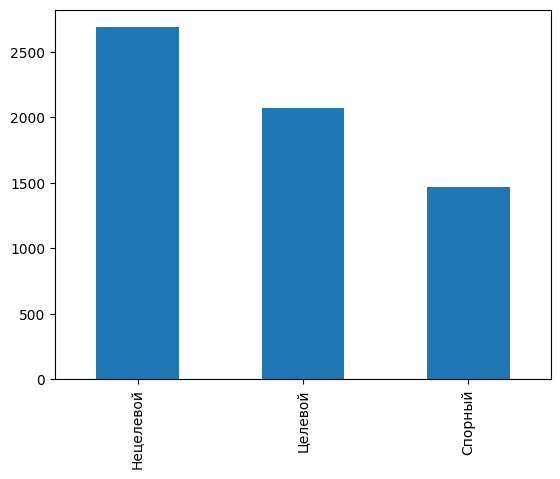

In [ ]:
# Соотношение классов
train_df['Класс'].value_counts().plot.bar()

In [ ]:
# Соотношение классов
print(f"Нецелевой: {train_df.loc[train_df[train_df['Класс'] == 'Нецелевой'].index, 'Класс'].count()}")
print(f"  Целевой: {train_df.loc[train_df[train_df['Класс'] == 'Целевой'].index, 'Класс'].count()}")
print(f"  Спорный: {train_df.loc[train_df[train_df['Класс'] == 'Спорный'].index, 'Класс'].count()}")
print('-'*15)
print(f"    Всего: {train_df['Класс'].count()}")

Нецелевой: 2689
  Целевой: 2074
  Спорный: 1470
---------------
    Всего: 6233


In [ ]:
# Описательные статистики по длине текстов транскрибации звонков
pd.concat([train_df.loc[train_df[train_df['Класс'] == 'Нецелевой'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe(),
           train_df.loc[train_df[train_df['Класс'] == 'Целевой'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe(),
           train_df.loc[train_df[train_df['Класс'] == 'Спорный'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe()],
          axis=1,
          keys=['Нецелевые звонки',
                'Целевые звонки',
                'Спорные звонки'])

,Нецелевые звонки,Целевые звонки,Спорные звонки
count,2689.000000,2074.000000,1470.000000
mean,181.085906,700.303761,43.498639
std,373.524044,617.232404,85.138583
min,1.000000,1.000000,1.000000
25%,13.000000,276.250000,6.250000
50%,42.000000,571.500000,17.000000
75%,191.000000,938.500000,53.000000
max,7482.000000,7296.000000,1712.000000


#### `test_df`

In [ ]:
# Смотрим размеры датафреймов
print(Headliner_targets_test_df.shape)
print(Headliner_not_targets_test_df.shape)
print(Headliner_moot_test_df.shape)
print(Primavera_targets_test_df.shape)
print(Primavera_not_targets_test_df.shape)
print(Paveletskaya_city_targets_test_df.shape)
print(Paveletskaya_city_not_targets_test_df.shape)

(55, 78)
(108, 78)
(163, 78)
(97, 78)
(130, 78)
(78, 78)
(60, 78)


In [ ]:
# Соединяем датафреймы
test_df = pd.concat([Headliner_targets_test_df,
                     Headliner_not_targets_test_df,
                     Headliner_moot_test_df,
                     Primavera_targets_test_df,
                     Primavera_not_targets_test_df,
                     Paveletskaya_city_targets_test_df,
                     Paveletskaya_city_not_targets_test_df])
test_df.index = range(test_df.shape[0])
test_df.shape

(691, 78)

In [ ]:
# Сохраняем test_df в pkl
with open(df_path + 'test_df.pkl', 'wb') as f:
  pkl.dump(test_df, f)

<Axes: >

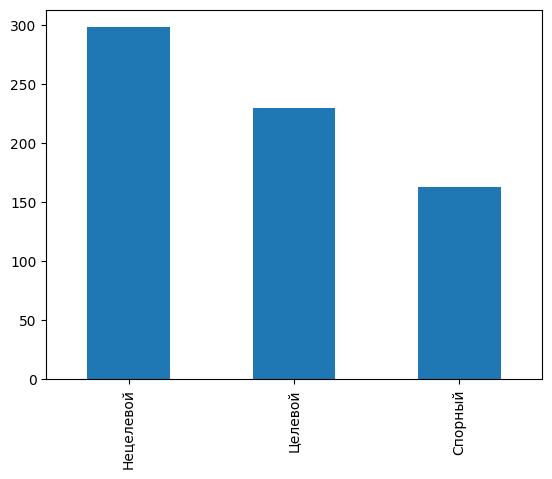

In [ ]:
# Соотношение классов
test_df['Класс'].value_counts().plot.bar()

In [ ]:
# Соотношение классов
print(f"Нецелевой: {test_df.loc[test_df[test_df['Класс'] == 'Нецелевой'].index, 'Класс'].count()}")
print(f"  Целевой: {test_df.loc[test_df[test_df['Класс'] == 'Целевой'].index, 'Класс'].count()}")
print(f"  Спорный: {test_df.loc[test_df[test_df['Класс'] == 'Спорный'].index, 'Класс'].count()}")
print('-'*14)
print(f"    Всего: {test_df['Класс'].count()}")

Нецелевой: 298
  Целевой: 230
  Спорный: 163
--------------
    Всего: 691


In [ ]:
# Описательные статистики по длине текстов транскрибации звонков
pd.concat([test_df.loc[test_df[test_df['Класс'] == 'Нецелевой'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe(),
           test_df.loc[test_df[test_df['Класс'] == 'Целевой'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe(),
           test_df.loc[test_df[test_df['Класс'] == 'Спорный'].index, 'Текст whisper-транскрибации записи звонка'].apply(lambda x: len(x.split(' '))).describe()],
          axis=1,
          keys=['Нецелевые звонки',
                'Целевые звонки',
                'Спорные звонки'])

,Нецелевые звонки,Целевые звонки,Спорные звонки
count,298.000000,230.000000,163.000000
mean,147.231544,660.617391,52.840491
std,249.696617,609.940545,66.575301
min,1.000000,1.000000,1.000000
25%,10.000000,265.250000,9.500000
50%,48.000000,464.000000,23.000000
75%,169.000000,833.000000,81.000000
max,2001.000000,4100.000000,447.000000


## [Анализ данных](https://habr.com/ru/companies/otus/articles/752434/) с помощью [`sweetviz`](https://habr.com/ru/articles/564172/)

### Загрузка датафреймов

In [5]:
# Загрузка train_df
with open(df_path + 'train_df.pkl', 'rb') as f:
  train_df = pkl.load(f)

# Загрузка test_df
with open(df_path + 'test_df.pkl', 'rb') as f:
  test_df = pkl.load(f)

### Предобработка датафреймов

#### `train_df`

In [ ]:
# Типы данных
train_df.dtypes

Статус                                               object
Тип                                                  object
Дата и время                                 datetime64[ns]
Номер абонента                                       object
Рекламная кампания                                   object
Длительность звонка                                 float64
Длительность ожидания ответа                        float64
Сотрудник                                            object
UTM-метка Campaign                                   object
Теги                                                 object
Номер обращения                                     float64
UTM-метка Term                                       object
Причина завершения                                   object
Виртуальный номер                                    object
UTM-метка Source                                     object
UTM-метка Medium                                     object
UTM-метка Content                       

In [ ]:
# Количество непустых записей в числовых данных
print(train_df['Длительность звонка'].count())
print(train_df['Длительность ожидания ответа'].count())
print(train_df['Номер обращения'].count())
print(train_df['ID посетителя'].count())
print(train_df['Идентификатор сессии звонка'].count())
print(train_df['Длительность обработки'].count())
print(train_df['Количество посещений'].count())
print(train_df['Длительность разговора'].count())
print(train_df['Длительность постобработки'].count())
print(train_df['Чистая длительность разговора'].count())
print(train_df['Полная длительность ожидания'].count())

6233
5705
6233
2175
6233
1
1619
6233
6233
6233
6233


In [ ]:
# Заполняем пустоты в числовых данных
for column in ['Длительность ожидания ответа',
               'ID посетителя',
               'Длительность обработки',
               'Количество посещений']:
  train_df[column] = train_df[column].fillna(0)

In [ ]:
# Количество непустых записей в числовых данных
print(train_df['Длительность звонка'].count())
print(train_df['Длительность ожидания ответа'].count())
print(train_df['Номер обращения'].count())
print(train_df['ID посетителя'].count())
print(train_df['Идентификатор сессии звонка'].count())
print(train_df['Длительность обработки'].count())
print(train_df['Количество посещений'].count())
print(train_df['Длительность разговора'].count())
print(train_df['Длительность постобработки'].count())
print(train_df['Чистая длительность разговора'].count())
print(train_df['Полная длительность ожидания'].count())

6233
6233
6233
6233
6233
6233
6233
6233
6233
6233
6233


In [ ]:
# Типы числовых данных
train_df[['Длительность звонка',
          'Длительность ожидания ответа',
          'Номер обращения',
          'ID посетителя',
          'Идентификатор сессии звонка',
          'Длительность обработки',
          'Количество посещений',
          'Длительность разговора',
          'Длительность постобработки',
          'Чистая длительность разговора',
          'Полная длительность ожидания']].dtypes

Длительность звонка              float64
Длительность ожидания ответа     float64
Номер обращения                  float64
ID посетителя                    float64
Идентификатор сессии звонка        int64
Длительность обработки           float64
Количество посещений             float64
Длительность разговора           float64
Длительность постобработки       float64
Чистая длительность разговора    float64
Полная длительность ожидания     float64
dtype: object

In [ ]:
# Приводим числовые данные к типу int
for column in ['Длительность звонка',
               'Длительность ожидания ответа',
               'Номер обращения',
               'ID посетителя',
               'Длительность обработки',
               'Количество посещений',
               'Длительность разговора',
               'Длительность постобработки',
               'Чистая длительность разговора',
               'Полная длительность ожидания']:
  train_df[column] = train_df[column].astype('int')

In [ ]:
# Типы числовых данных
train_df[['Длительность звонка',
          'Длительность ожидания ответа',
          'Номер обращения',
          'ID посетителя',
          'Идентификатор сессии звонка',
          'Длительность обработки',
          'Количество посещений',
          'Длительность разговора',
          'Длительность постобработки',
          'Чистая длительность разговора',
          'Полная длительность ожидания']].dtypes

Длительность звонка              int64
Длительность ожидания ответа     int64
Номер обращения                  int64
ID посетителя                    int64
Идентификатор сессии звонка      int64
Длительность обработки           int64
Количество посещений             int64
Длительность разговора           int64
Длительность постобработки       int64
Чистая длительность разговора    int64
Полная длительность ожидания     int64
dtype: object

In [ ]:
# Количество непустых записей
train_df.count()

Статус                                       6233
Тип                                          6233
Дата и время                                 6233
Номер абонента                               6233
Рекламная кампания                           6233
Длительность звонка                          6233
Длительность ожидания ответа                 6233
Сотрудник                                    6233
UTM-метка Campaign                           1044
Теги                                         6233
Номер обращения                              6233
UTM-метка Term                                697
Причина завершения                           5705
Виртуальный номер                            6233
UTM-метка Source                             1071
UTM-метка Medium                             1063
UTM-метка Content                            1003
Client ID Яндекс.Метрика                     6233
Первая рекламная кампания                    6233
ID посетителя                                6233


In [ ]:
# Заполняем пустоты в числовых данных
for column in ['Идентификатор звонка во внешней системе',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid']:
  train_df[column] = train_df[column].fillna('0')

In [ ]:
# Приводим числовые данные к типу int
for column in ['Номер абонента',
               'Виртуальный номер',
               'Идентификатор звонка во внешней системе',
               'Номер сотрудника',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка ymclid']:
  train_df[column] = train_df[column].astype('int')

In [ ]:
# Заполняем оставшиеся пустоты
train_df = train_df.fillna('nan')

In [ ]:
# Меняем '' на 'nan' для однообразия
for column in train_df.columns.values:
  train_df[column] = train_df[column].apply(lambda x: 'nan' if x == '' else x)

In [6]:
# Количество непустых записей
train_df.count()

Статус                                       6233
Тип                                          6233
Дата и время                                 6233
Номер абонента                               6233
Рекламная кампания                           6233
Длительность звонка                          6233
Длительность ожидания ответа                 6233
Сотрудник                                    6233
UTM-метка Campaign                           6233
Теги                                         6233
Номер обращения                              6233
UTM-метка Term                               6233
Причина завершения                           6233
Виртуальный номер                            6233
UTM-метка Source                             6233
UTM-метка Medium                             6233
UTM-метка Content                            6233
Client ID Яндекс.Метрика                     6233
Первая рекламная кампания                    6233
ID посетителя                                6233


In [42]:
# Меняем 'nan' на '0' в числовых данных
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  train_df[column] = train_df[column].apply(lambda x: '0' if x == 'nan' else x)

In [46]:
# Очистка от '{}' в числовых данных
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  train_df[column] = train_df[column].apply(lambda x: x.strip('{}'))

In [47]:
# Приводим числовые данные к типу float
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  train_df[column] = train_df[column].astype('float')

In [48]:
train_df.dtypes

Статус                                               object
Тип                                                  object
Дата и время                                 datetime64[ns]
Номер абонента                                        int64
Рекламная кампания                                   object
Длительность звонка                                   int64
Длительность ожидания ответа                          int64
Сотрудник                                            object
UTM-метка Campaign                                   object
Теги                                                 object
Номер обращения                                       int64
UTM-метка Term                                       object
Причина завершения                                   object
Виртуальный номер                                     int64
UTM-метка Source                                     object
UTM-метка Medium                                     object
UTM-метка Content                       

#### `test_df`

In [6]:
# Типы данных
test_df.dtypes

Статус                                               object
Тип                                                  object
Дата и время                                 datetime64[ns]
Номер абонента                                       object
Рекламная кампания                                   object
Длительность звонка                                 float64
Длительность ожидания ответа                        float64
Сотрудник                                            object
UTM-метка Campaign                                   object
Теги                                                 object
Номер обращения                                     float64
UTM-метка Term                                       object
Причина завершения                                   object
Виртуальный номер                                    object
UTM-метка Source                                     object
UTM-метка Medium                                     object
UTM-метка Content                       

In [7]:
# Количество непустых записей
for column in test_df.columns.values:
  if test_df[column].count() < 691:  print(test_df[column].count(), '\t', test_df[column].dtype, '\t', column)

464 	 float64 	 Длительность ожидания ответа
137 	 object 	 UTM-метка Campaign
95 	 object 	 UTM-метка Term
464 	 object 	 Причина завершения
138 	 object 	 UTM-метка Source
138 	 object 	 UTM-метка Medium
128 	 object 	 UTM-метка Content
284 	 float64 	 ID посетителя
0 	 object 	 Идентификатор звонка во внешней системе
236 	 object 	 URL страницы обращения
200 	 object 	 Город
221 	 object 	 Страна
0 	 object 	 Оценка сотрудника
0 	 object 	 ФИО контакта
0 	 object 	 Имя тренера
687 	 object 	 Операции
0 	 object 	 Группа, выбранная посетителем
1 	 float64 	 Длительность обработки
0 	 object 	 Комментарий
0 	 object 	 Контакт из CRM
117 	 object 	 Поисковая система
146 	 object 	 Поисковый запрос
186 	 object 	 Реферер
186 	 object 	 Домен реферера
203 	 object 	 Область
228 	 object 	 Посадочная страница
235 	 float64 	 Количество посещений
235 	 object 	 ID ресурса Google Analytics
0 	 object 	 UTM-метка Referrer
0 	 object 	 UTM-метка Expid
0 	 object 	 AdLense-метка ef_id
124 	 ob

In [8]:
# Заполняем пустоты в числовых данных
for column in ['Длительность ожидания ответа',
               'Идентификатор звонка во внешней системе',
               'ID посетителя',
               'Длительность обработки',
               'Количество посещений']:
  test_df[column] = test_df[column].fillna(0)

In [9]:
# Приводим числовые данные к типу int
for column in ['Длительность звонка',
               'Длительность ожидания ответа',
               'Идентификатор звонка во внешней системе',
               'Номер обращения',
               'ID посетителя',
               'Длительность обработки',
               'Количество посещений',
               'Длительность разговора',
               'Длительность постобработки',
               'Чистая длительность разговора',
               'Полная длительность ожидания']:
  test_df[column] = test_df[column].astype('int')

In [10]:
# Типы числовых данных
test_df[['Длительность звонка',
          'Длительность ожидания ответа',
         'Идентификатор звонка во внешней системе',
          'Номер обращения',
          'ID посетителя',
          'Идентификатор сессии звонка',
          'Длительность обработки',
          'Количество посещений',
          'Длительность разговора',
          'Длительность постобработки',
          'Чистая длительность разговора',
          'Полная длительность ожидания']].dtypes

Длительность звонка                        int64
Длительность ожидания ответа               int64
Идентификатор звонка во внешней системе    int64
Номер обращения                            int64
ID посетителя                              int64
Идентификатор сессии звонка                int64
Длительность обработки                     int64
Количество посещений                       int64
Длительность разговора                     int64
Длительность постобработки                 int64
Чистая длительность разговора              int64
Полная длительность ожидания               int64
dtype: object

In [11]:
# Заполняем оставшиеся пустоты
test_df = test_df.fillna('nan')

In [12]:
# Меняем '' на 'nan' для однообразия
for column in test_df.columns.values:
  test_df[column] = test_df[column].apply(lambda x: 'nan' if x == '' else x)

In [13]:
# Количество непустых записей
test_df.count()

Статус                                       691
Тип                                          691
Дата и время                                 691
Номер абонента                               691
Рекламная кампания                           691
Длительность звонка                          691
Длительность ожидания ответа                 691
Сотрудник                                    691
UTM-метка Campaign                           691
Теги                                         691
Номер обращения                              691
UTM-метка Term                               691
Причина завершения                           691
Виртуальный номер                            691
UTM-метка Source                             691
UTM-метка Medium                             691
UTM-метка Content                            691
Client ID Яндекс.Метрика                     691
Первая рекламная кампания                    691
ID посетителя                                691
Страна номера абонен

In [14]:
# Меняем 'nan' на '0' в числовых данных
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  test_df[column] = test_df[column].apply(lambda x: '0' if x == 'nan' else x)

In [15]:
# Очистка от '{}' в числовых данных
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  test_df[column] = test_df[column].apply(lambda x: x.strip('{}'))

In [16]:
# Приводим числовые данные к типу float
for column in ['Client ID Яндекс.Метрика',
               'Client ID Google Analytics',
               'ID счетчика Яндекс.Метрика',
               'UTM-метка Referrer',
               'UTM-метка Expid',
               'AdLense-метка ef_id',
               'Метка yclid',
               'Метка ymclid',
               'OS-метка campaign-id',
               'OS-метка ad-id']:
  test_df[column] = test_df[column].astype('float')

In [17]:
test_df.dtypes

Статус                                               object
Тип                                                  object
Дата и время                                 datetime64[ns]
Номер абонента                                       object
Рекламная кампания                                   object
Длительность звонка                                   int64
Длительность ожидания ответа                          int64
Сотрудник                                            object
UTM-метка Campaign                                   object
Теги                                                 object
Номер обращения                                       int64
UTM-метка Term                                       object
Причина завершения                                   object
Виртуальный номер                                    object
UTM-метка Source                                     object
UTM-метка Medium                                     object
UTM-метка Content                       

### Сохранение датафреймов

In [18]:
# Сохраняем train_df в pkl
with open(df_path + 'train_df.pkl', 'wb') as f:
  pkl.dump(train_df, f)

# Сохраняем test_df в pkl
with open(df_path + 'test_df.pkl', 'wb') as f:
  pkl.dump(test_df, f)

### Отчёты

In [51]:
# Отчёт по train_df
report = sv.analyze([train_df, 'Анализ train_df'])
report.show_html(df_path + 'train_df.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 774 (\N{COMBINING BREVE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 774 (\N{COMBINING BREVE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)


Report /content/drive/MyDrive/media108.ru/Новички/Датафреймы/train_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[Отчёт по train_df](https://drive.google.com/file/d/1m9KOTV5z8I088FxCo9F0KHRGw5AQqiGe/view?usp=sharing)

In [19]:
# Отчёт по test_df
report = sv.analyze([test_df, 'Анализ test_df'])
report.show_html(df_path + 'test_df.html')

                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 774 (\N{COMBINING BREVE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/usr/local/lib/python3.10/dist-packages/sweetviz/graph.py:33: UserWarning: Glyph 774 (\N{COMBINING BREVE}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)


Report /content/drive/MyDrive/media108.ru/Новички/Датафреймы/test_df.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


[Отчёт по test_df](https://drive.google.com/file/d/1onH5Vsuv80wBI6pV4ztAr5AI3Z8nRf8X/view?usp=sharing)